In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal



In [1]:
import nbformat

with open("compare_countries.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)
print(" Notebook is valid.")



 Notebook is valid.


In [10]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra, togo], ignore_index=True)


In [14]:
df_all.shape

(1543517, 20)

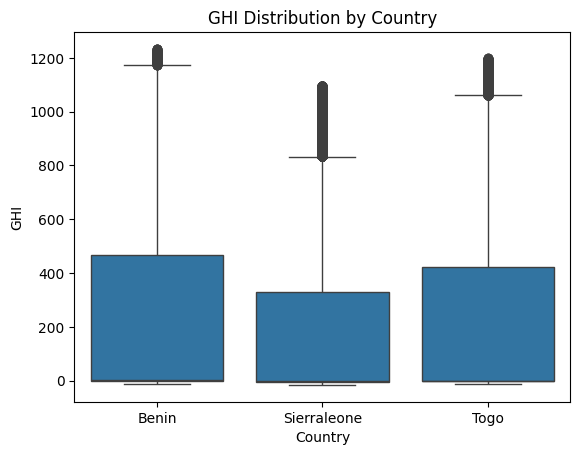

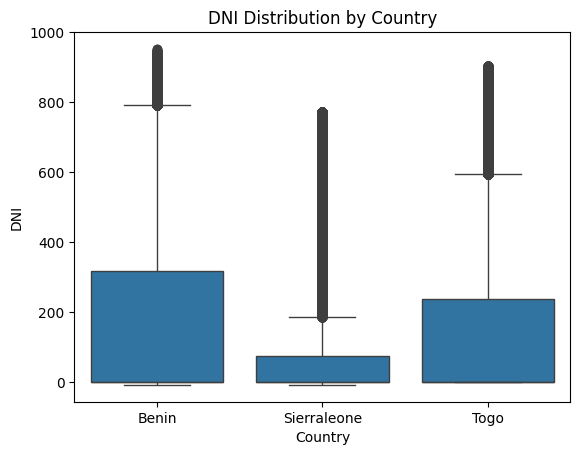

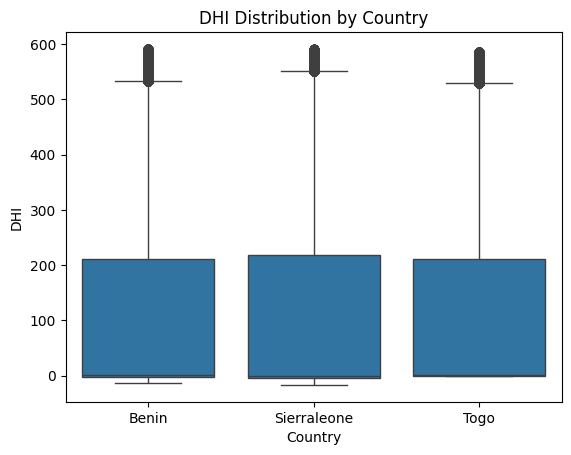

In [11]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f"{metric} Distribution by Country")
    plt.show()


In [12]:
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary


GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierraleone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo         223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                    DHI                     
                   mean median         std  
Country                                     
Benin        111.656477    0.5  153.099749  
Sierraleone  108.104278   -0.6  153.691835  
Togo         112.781249    1.5  151.571744

In [13]:
# ANOVA
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"ANOVA: F={f_stat:.2f}, p={p_val:.4f}")

# Kruskal–Wallis (non-parametric)
k_stat, k_pval = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"Kruskal–Wallis: H={k_stat:.2f}, p={k_pval:.4f}")



ANOVA: F=3833.18, p=0.0000
Kruskal–Wallis: H=6548.53, p=0.0000


### Key Observations
- Benin shows the highest median GHI but also the greatest variability.
- Sierra Leone has the lowest average DNI, suggesting less direct solar exposure.
- Togo’s DHI is consistently moderate, indicating stable diffuse irradiance.


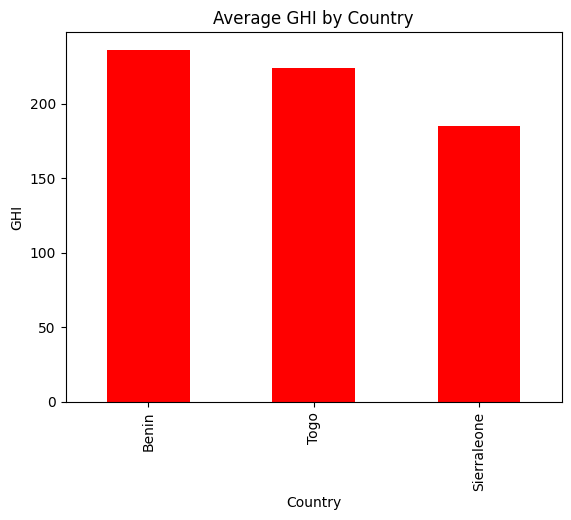

In [16]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color='red')
plt.title("Average GHI by Country")
plt.ylabel("GHI")
plt.show()
